In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ds701_midterm25_notebook.ipynb")

## Stroke Risk Prediction - DS701 Midterm Challenge

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

# Load Dataset
df = pd.read_csv("strokeX.csv")
print("Dataset Shape:", df.shape)
display(df.head())

# Store the original columns
original_columns = df.columns.tolist()

# Unique patient record
print(f"Unique patients: {df.shape[0]} (1 record per patient assumed)")

# Basic descriptive stats
df.describe(include='all').T

Dataset Shape: (14976, 19)


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk
0,21,Male,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,18.5,0
1,32,Female,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,55.7,1
2,21,Male,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23.0,0
3,51,Male,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,100.0,1
4,60,Female,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,100.0,1


Unique patients: 14976 (1 record per patient assumed)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,14976.0,NaN,NaN,NaN,43.178218,11.869719,18.0,34.0,42.0,52.0,86.0
gender,14976,2,Female,7507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain,14976.0,NaN,NaN,NaN,0.216747,0.412042,0.0,0.0,0.0,0.0,1.0
high_bp,14976.0,NaN,NaN,NaN,0.345219,0.475456,0.0,0.0,0.0,1.0,1.0
irregular_heartbeat,14976.0,NaN,NaN,NaN,0.158053,0.364803,0.0,0.0,0.0,0.0,1.0
short_breath,14976.0,NaN,NaN,NaN,0.266827,0.442316,0.0,0.0,0.0,1.0,1.0
fatigue,14976.0,NaN,NaN,NaN,0.321448,0.467048,0.0,0.0,0.0,1.0,1.0
dizziness,14976.0,NaN,NaN,NaN,0.266894,0.442351,0.0,0.0,0.0,1.0,1.0
swelling,14976.0,NaN,NaN,NaN,0.218283,0.413094,0.0,0.0,0.0,0.0,1.0
neckjaw_pain,14976.0,NaN,NaN,NaN,0.162193,0.36864,0.0,0.0,0.0,0.0,1.0


### Part 1 - Exploratory Feature Analysis & Risk Engineering

<!-- BEGIN QUESTION -->

#### Q1.1 Age-Normalized Risk Index (ANRI) (5 points)

The **Age-Normalized Risk Index (ANRI)** identifies patients whose stroke risk is unusually high for their age.  
A higher ANRI indicates a higher stroke risk relative to age.

*Hint: ANRI is calculated by dividing each patient’s `stroke_risk_pct` by their `age`.*

**Tasks:**
1. Compute a new column `ANRI` (handle divide-by-zero safely).  
2. Plot the distribution of ANRI using a **histogram** (with KDE).   
3. Show the **top 10 patients** with the highest ANRI values and briefly interpret the results.

Top 10 patients with highest ANRI:


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk,ANRI
11337,31,Male,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,100.0,1,3.225806
589,31,Female,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,100.0,1,3.225806
3749,31,Male,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,100.0,1,3.225806
14739,21,Female,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,67.5,1,3.214286
360,30,Male,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,92.1,1,3.070000
9612,31,Male,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,92.8,1,2.993548
7975,34,Female,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,100.0,1,2.941176
1053,34,Female,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,100.0,1,2.941176
11778,31,Female,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,90.7,1,2.925806
5828,31,Female,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,90.7,1,2.925806


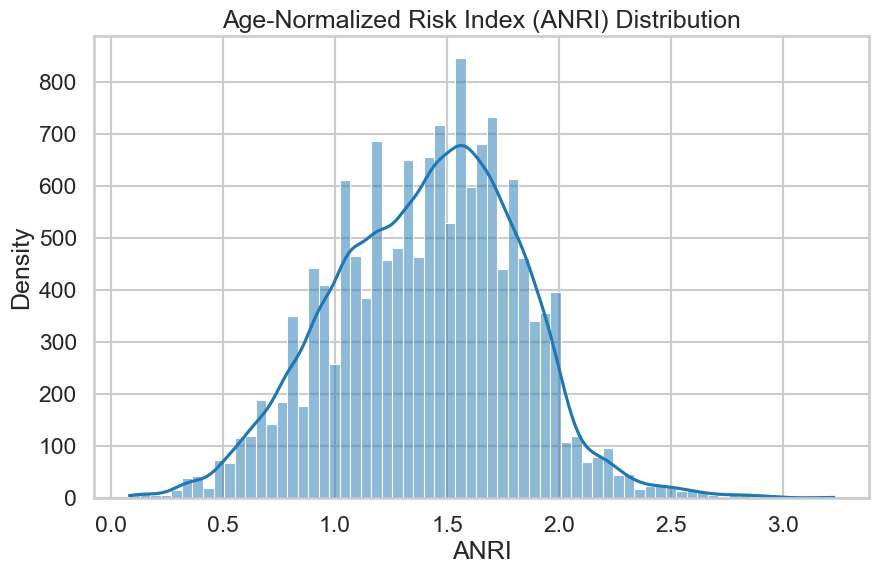

In [3]:
from IPython.display import display


def compute_anri(df):
    """
    Compute and visualize the Age-Normalized Risk Index (ANRI)
    """

    # defining ANRI column. handle divide-by-zero by only dividing when age != 0 and setting ANRI to 0 otherwise
    df["ANRI"] = np.where(df["age"] != 0, 
                        df["stroke_risk_pct"] / df["age"], 
                        0)
    # top 10 patients 
    print("Top 10 patients with highest ANRI:")
    top10 = df.sort_values(by= "ANRI", ascending=False).head(10)
    display(top10)
    
    # plotting ANRI distribution 
    plt.figure(figsize=(10, 6))
    sns.histplot(df["ANRI"], kde = True)
    plt.title("Age-Normalized Risk Index (ANRI) Distribution")
    plt.xlabel("ANRI")
    plt.ylabel("Density")
    plt.show()

    return df 


df = compute_anri(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.2 Chronic Condition Score (CCS) (5 points)

The **Chronic Condition Score (CCS)** represents the number of chronic cardiovascular conditions a patient has, specifically high blood pressure and irregular heartbeat.  
A higher CCS indicates greater chronic disease burden.

*Hint: CCS is the sum of the binary columns `high_bp` and `irregular_heartbeat`.*

**Tasks:**
1. Add a new column `CCS` to the DataFrame.
2. Compute the **average stroke risk percentage** for each CCS level (0, 1, 2).  
3. Visualize the results using a **bar plot**, and interpret how stroke risk changes with higher CCS.

,CCS,stroke_risk_pct
0,0,52.715864
1,1,72.368611
2,2,85.895017


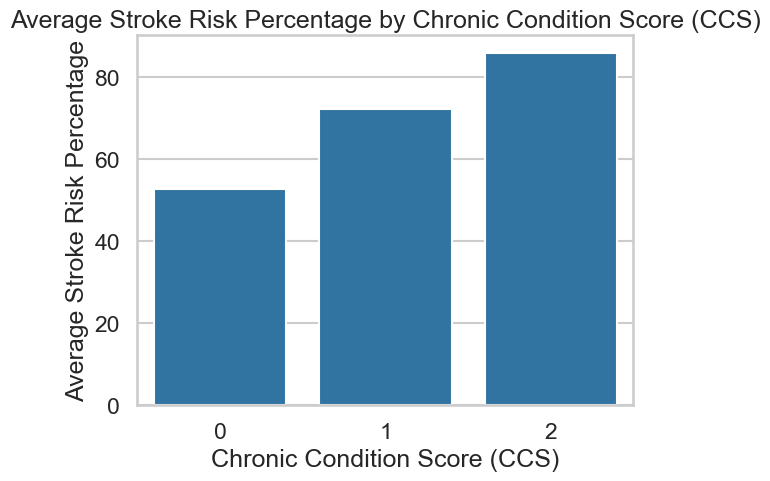

In [4]:
def compute_ccs(df):
    """
    Compute and visualize the Chronic Condition Score (CCS)
    """

    # defining CCS column 
    df["CCS"] = df["high_bp"] + df["irregular_heartbeat"]
    
    # computing the average stroke risk percentage per CCS level 
    ccs_summary = df.groupby("CCS")["stroke_risk_pct"].mean().reset_index()
    display(ccs_summary)
    
    sns.barplot(data=ccs_summary, x="CCS", y="stroke_risk_pct")
    plt.title("Average Stroke Risk Percentage by Chronic Condition Score (CCS)")
    plt.xlabel("Chronic Condition Score (CCS)")
    plt.ylabel("Average Stroke Risk Percentage")
    plt.show()

    return ccs_summary

    
ccs_summary = compute_ccs(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.3 Symptom Burden Index (SBI) (5 points)

The **Symptom Burden Index (SBI)** quantifies the total number of symptoms reported by each patient.  
A higher SBI indicates a greater overall symptom load, which is expected to relate to higher stroke risk.

*Hint: SBI is the sum of all symptom indicator columns (values 0 or 1).*

**Tasks:**
1. Compute the total `SBI` for each patient using all symptom columns. Categorize patients into three groups based on SBI - *Low (0–3)*; *Moderate (4–6)*; *High (7+)*
2. Analyze how the **average stroke risk percentage** changes across these SBI groups 
3. Compute the **correlation** between `SBI` and `stroke_risk_pct`. 

In [5]:
def compute_sbi(df):
    """
    Compute the Symptom Burden Index (SBI)
    """
    columns = [
        'chest_pain',
        'high_bp',
        'irregular_heartbeat',
        'short_breath',
        'fatigue',
        'dizziness',
        'swelling',
        'excess_sweating',
        'persistent_cough',
        'nausea_vomiting',
        'chest_discomfort',
        'cold_extremities',
        'sleep_apnea',
        'anxiety'
    ]

    # defining SBI column 
    df["SBI"] = df[columns].sum(axis=1)

    # categorizing the SBI into 'Low', 'Moderate', 'High'
    df["SBI_category"] = np.where(df["SBI"] <= 3, 'Low',
                        np.where(df["SBI"] <= 6, 'Moderate', 'High'))
    
    # average stroke risk percentage per SBI category 
    sbi_summary = df.groupby("SBI_category")["stroke_risk_pct"].mean().reset_index()
    display(sbi_summary)

    print("The correlation between SBI and Stroke Risk Percentage is:", df["SBI"].corr(df["stroke_risk_pct"]))

    return df 

sbi_summary = compute_sbi(df)

,SBI_category,stroke_risk_pct
0,High,99.265926
1,Low,51.106698
2,Moderate,82.444564


The correlation between SBI and Stroke Risk Percentage is: 0.6581483422036207


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.4 Symptom Predictive Power using Mutual Information (MI) (5 points)

**Mutual Information (MI)** measures how informative a feature is for predicting a target variable.  
Here, it shows how strongly each symptom relates to the stroke risk label (`at_risk`).

*Hint: Use *`mutual_info_classif`* from *`sklearn.feature_selection`* to compute MI scores.*

**Tasks:**
1. Compute the 'MI' score between each symptom and `at_risk`.  
2. Sort symptoms by MI score and list the **Top 10** most predictive ones.  

In [6]:
def compute_mi(df):
    """
    Compute the Mutual Information (MI) score
    """
    from sklearn.feature_selection import mutual_info_classif

    columns = [
        'chest_pain',
        'high_bp',
        'irregular_heartbeat',
        'short_breath',
        'fatigue',
        'dizziness',
        'swelling',
        'excess_sweating',
        'persistent_cough',
        'nausea_vomiting',
        'chest_discomfort',
        'cold_extremities',
        'sleep_apnea',
        'anxiety'
    ]

    # MI scores between each feature and at_risk
    MI_scores = mutual_info_classif(df[columns], df["at_risk"], random_state=42)
    
    # add feature names with the corresponding MI scores
    MI_series = pd.Series(MI_scores, index=columns)
    
    # top 10 
    MI_sorted = MI_series.sort_values(ascending=False).head(10)
    display(MI_sorted)
    
    return df

mi_summary = compute_mi(df)

high_bp                0.056412
chest_pain             0.031820
chest_discomfort       0.026103
short_breath           0.024121
sleep_apnea            0.018626
cold_extremities       0.011448
irregular_heartbeat    0.010335
fatigue                0.008952
dizziness              0.008924
swelling               0.005259
dtype: float64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.5 Age-Adjusted Risk Z-Scores (AARZ) (5 points)

The **Age-Adjusted Risk Z-Score (AARZ)** compares a patient’s stroke risk to others in the same age group.  
It highlights patients whose risk levels are unusually high or low relative to their peers.

*Hint: For each 10-year age group, calculate how many standard deviations a patient’s stroke risk percentage is above or below the group’s mean value.*

**Tasks:**
1. Create 10-year age bins, within each age group, compute the *Z-score* for stroke risk (`stroke_risk_pct`).  
2. Identify the **Top 5 patients** with the highest Z-scores (highest relative risk).  
3. For **each age group**, list the **Top 2 patients** with the highest Z-scores. 

In [7]:
def compute_aarz(df):
    """
    Compute Age-Adjusted Risk Z-Scores (AARZ)
    """

    # making 10-year age groups 
    df["age_group"] = pd.cut(df["age"], bins=range(0, 100, 10), right=False)

    # computing Z-scores within each age group
    df["AARZ"] = df.groupby("age_group")["stroke_risk_pct"].transform(
        lambda x: (x - x.mean()) / x.std()
    )

    # top 5 outliers with highest AARZ
    top5_outliers = df.sort_values(by="AARZ", ascending=False).head(5)
    print("Top 5 patients with highest AARZ:")
    display(top5_outliers)

    # listing top 2 patients by AARZ within each age group
    top_by_group = df.groupby("age_group").apply(lambda x: x.nlargest(2, "AARZ"))
    print("Top 2 patients by AARZ within each age group:")
    display(top_by_group) 

    return top5_outliers, top_by_group 

top5_outliers, top_by_group = compute_aarz(df)

Top 5 patients with highest AARZ:


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,...,sleep_apnea,anxiety,stroke_risk_pct,at_risk,ANRI,CCS,SBI,SBI_category,age_group,AARZ
8699,26,Male,1,0,0,1,0,0,0,1,...,1,0,74.8,1,2.876923,0,4,Moderate,"[20, 30)",4.217790
2185,26,Female,1,0,0,1,0,0,0,0,...,1,0,68.2,1,2.623077,0,4,Moderate,"[20, 30)",3.622018
14739,21,Female,1,1,0,0,1,1,0,0,...,0,0,67.5,1,3.214286,1,5,Moderate,"[20, 30)",3.558830
11930,27,Female,0,1,0,1,1,0,0,0,...,1,0,67.1,1,2.485185,1,5,Moderate,"[20, 30)",3.522722
12298,29,Male,1,0,0,0,0,0,1,0,...,1,1,66.5,1,2.293103,0,5,Moderate,"[20, 30)",3.468561


Top 2 patients by AARZ within each age group:


age  gender  chest_pain  high_bp  irregular_heartbeat  \
age_group                                                                
[10, 20)  9288    19  Female           0        0                    0   
          12113   19  Female           1        0                    0   
[20, 30)  8699    26    Male           1        0                    0   
          2185    26  Female           1        0                    0   
[30, 40)  589     31  Female           0        1                    1   
          1053    34  Female           1        1                    0   
[40, 50)  845     45  Female           1        1                    0   
          895     45  Female           0        1                    1   
[50, 60)  3       51    Male           1        0                    0   
          6       58    Male           0        1                    1   
[60, 70)  4       60  Female           0        1                    1   
          19      64    Male           1        0                    1   
[70, 80)  29      76    Male           1        1                    0   
          106     70  Female           1        1                    0   
[80, 90)  1220    80  Female           0        1                    0   
          1243    81  Female           0        1                    0   

                 short_breath  fatigue  dizziness  swelling  neckjaw_pain  \
age_group                                                                   
[10, 20)  9288              1        0          0         0             0   
          12113             1        0          1         0             0   
[20, 30)  8699              1        0          0         0             1   
          2185              1        0          0         0             0   
[30, 40)  589               1        0          1         1             0   
          1053              1        0          0         0             1   
[40, 50)  845               0        1          0         0             0   
          895               1        1          1         0             0   
[50, 60)  3                 1        0          0         1             0   
          6                 0        1          0         0             1   
[60, 70)  4                 0        1          0         0             0   
          19                1        0          0         0             0   
[70, 80)  29                1        0          1         0             0   
          106               0        0          0         1             0   
[80, 90)  1220              1        1          1         0             1   
          1243              0        0          1         1             0   

                 ...  sleep_apnea  anxiety  stroke_risk_pct  at_risk  \
age_group        ...                                                   
[10, 20)  9288   ...            1        0             51.6        1   
          12113  ...            0        0             46.6        0   
[20, 30)  8699   ...            1        0             74.8        1   
          2185   ...            1        0             68.2        1   
[30, 40)  589    ...            1        1            100.0        1   
          1053   ...            0        0            100.0        1   
[40, 50)  845    ...            1        1            100.0        1   
          895    ...            0        0            100.0        1   
[50, 60)  3      ...            1        0            100.0        1   
          6      ...            0        0            100.0        1   
[60, 70)  4      ...            0        0            100.0        1   
          19     ...            0        0            100.0        1   
[70, 80)  29     ...            0        0            100.0        1   
          106    ...            0        0            100.0        1   
[80, 90)  1220   ...            1        0            100.0        1   
          1243   ...            1        1            100.0        1   



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.6 Risk Consistency Index (RCI) (5 points)

The **Risk Consistency Index (RCI)** measures how well the continuous stroke risk scores align with the binary label `at_risk`.  
It captures how distinctly the two groups: *at risk* and *not at risk*, differ in their average stroke risk percentage.
Higher RCI values indicate stronger consistency between risk scores and the `at_risk` label.

*Hint: RCI is calculated by taking the absolute difference between the group means and dividing it by the pooled standard deviation.*  

**Tasks:** 
1. Compute the mean and standard deviation of `stroke_risk_pct` for both groups and 
2. Calculate the `RCI`.
2. Interpret whether stroke risk percentages are consistent with the binary classification labels.

,mean,std,RCI
at_risk,,,
0,34.854316,10.266726,24.587591
1,79.363510,18.024955,61.338555


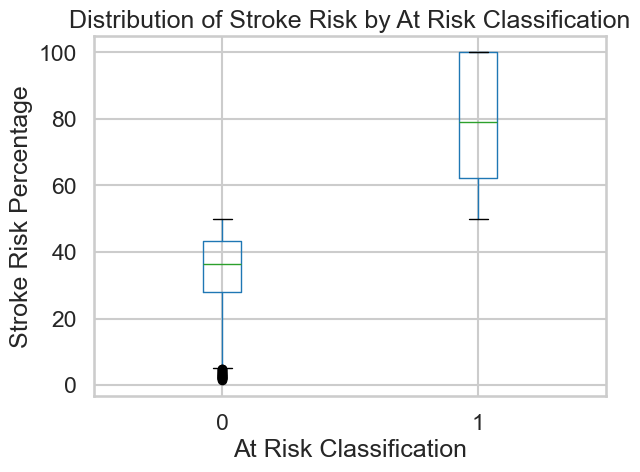

In [8]:
def compute_rci(df):
    """
    Compute the Risk Consistency Index (RCI) 
    """
    # mean and standard deviation
    at_risk_df = df.groupby("at_risk")["stroke_risk_pct"].agg(['mean', 'std'])
    
    # rci formula
    at_risk_df['RCI'] = np.abs(at_risk_df['mean'] - at_risk_df['std'])
    display(at_risk_df)
    
    df.boxplot(column='stroke_risk_pct', by='at_risk')
    plt.xlabel('At Risk Classification')
    plt.ylabel('Stroke Risk Percentage')
    plt.title('Distribution of Stroke Risk by At Risk Classification')
    plt.suptitle('')
    plt.show()
    
    return at_risk_df


RCI = compute_rci(df)

### Individuals that are not at risk of a stroke tend to have less stroke risk percentage and individuals that are at risk of a stroke tend to have a higher stroke risk perecentage. Therefore, the stroke risk percentages are consistent with the binary classification. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.7 Composite Health Risk Index (CHRI) (5 points)

The **Composite Health Risk Index (CHRI)** combines multiple cardiovascular indicators into a single, weighted risk score.  
It integrates *high blood pressure*, *irregular heartbeat*, and *age-normalized risk (ANRI)* to capture an individual’s overall health vulnerability.

*Hint:* Compute CHRI using the weighted formula:  *CHRI = 0.4 * High Blood Pressure + 0.4 * Irregular Heartbeat + 0.2 * ANRI*

**Tasks:**
1. Calculate the **Composite Health Risk Index (CHRI)** for each patient.   
2. Find the **Top 5 patients** with the highest CHRI values.
3.   Compute correlations between `CHRI` and both `stroke_risk_pct` and `at_risk`.

In [9]:
def compute_chri(df):
    """
    Compute the Composite Health Risk Index (CHRI) 
    """
    from sklearn.feature_selection import mutual_info_regression

    df["CHRI"]= (0.4 * df["high_bp"]) + (0.4 * df["irregular_heartbeat"]) + (0.2 * df["ANRI"]) 

    top_chri = df.nlargest(5, "CHRI")
    print("Top 5 CHRI patients:")
    display(top_chri) 
    print("\n")

    cols = ["stroke_risk_pct", "at_risk"]

    corr_chri_risk = mutual_info_regression(df[["stroke_risk_pct"]], df["CHRI"], random_state = 42)
    corr_chri_label =  mutual_info_regression(df[["at_risk"]], df["CHRI"], random_state = 42)

    print("CHRI + STROKE RISK PCT ", corr_chri_risk)
    print("CHRI + AT RISK LABEL ", corr_chri_label)
    
    return df, top_chri, corr_chri_risk, corr_chri_label

df, top_chri, corr_chri_risk, corr_chri_label = compute_chri(df)

Top 5 CHRI patients:


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,...,anxiety,stroke_risk_pct,at_risk,ANRI,CCS,SBI,SBI_category,age_group,AARZ,CHRI
589,31,Female,0,1,1,1,0,1,1,0,...,1,100.0,1,3.225806,2,8,High,"[30, 40)",3.254954,1.445161
5828,31,Female,0,1,1,1,0,0,1,0,...,0,90.7,1,2.925806,2,7,High,"[30, 40)",2.684568,1.385161
43,33,Male,1,1,1,0,1,0,0,1,...,0,95.9,1,2.906061,2,5,Moderate,"[30, 40)",3.003494,1.381212
2879,31,Male,1,1,1,1,0,0,0,0,...,0,88.3,1,2.848387,2,5,Moderate,"[30, 40)",2.537372,1.369677
11279,32,Male,1,1,1,0,0,0,1,0,...,1,89.6,1,2.800000,2,6,Moderate,"[30, 40)",2.617103,1.360000




CHRI + STROKE RISK PCT  [4.54064712]
CHRI + AT RISK LABEL  [0.58875347]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.8 Risk Stratification Buckets (5 points)

The **Risk Stratification Buckets** divide patients into *Low*, *Moderate*, and *High* risk groups based on their normalized stroke risk percentage.  
This helps compare how *age*, *symptom burden (SBI)*, and *chronic conditions (CCS)* vary across different risk levels.

*Hint: Normalize `stroke_risk_pct` by dividing by 100, then assign each patient to a risk category.*

**Tasks:**
1. Categorize patients into three buckets — *Low (0–0.3)*, *Moderate (0.3–0.7)*, *High (0.7–1.0)*. For each group, compute the average **age**, **SBI**, and **CCS**.  
2. Visualize these averages using a bar plot with a log scale on the y-axis and interpret how patient characteristics differ by risk level.

,risk_bucket,age,SBI,CCS
0,High,53.879231,4.080395,0.775564
1,Low,29.332577,1.565834,0.127696
2,Moderate,38.365155,2.758552,0.386237


<Figure size 1200x600 with 0 Axes>

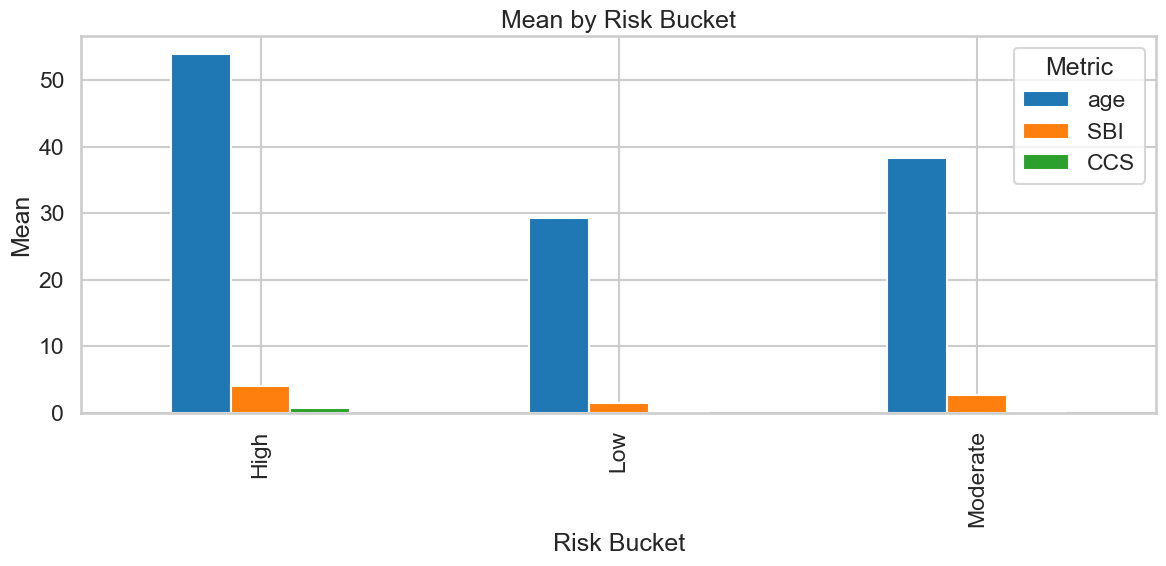

In [10]:
def compute_risk_buckets(df):
    """
    Create risk stratification buckets based on normalized stroke risk percentage
    """
    new_df = df.copy()
    
    # normalize
    new_df["stroke_risk_pct"] = new_df["stroke_risk_pct"] / 100 
    
    # assign to category 
    new_df["risk_bucket"] = np.where(new_df["stroke_risk_pct"] <= 0.3, "Low", 
                     np.where(new_df["stroke_risk_pct"] <= 0.7, "Moderate", "High"))
    
    bucket_summary = new_df.groupby("risk_bucket")[["age", "SBI", "CCS"]].agg("mean")
    bucket_summary = bucket_summary.reset_index()  
    display(bucket_summary)  
    
    # barplot 
    plt.figure(figsize=(12, 6))
    
    bucket_summary.set_index('risk_bucket')[['age', 'SBI', 'CCS']].plot(kind='bar', figsize=(12, 6))
    plt.title('Mean by Risk Bucket')
    plt.xlabel('Risk Bucket')
    plt.ylabel('Mean')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
    
    return bucket_summary
    
bucket_summary = compute_risk_buckets(df)

<!-- END QUESTION -->



In [11]:
# Newly Created Columns
current_columns = df.columns.tolist()
new_columns = [col for col in current_columns if col not in original_columns]

print("Columns present in the final DataFrame:\n")
print(current_columns)

print("\n Newly created columns:")
if new_columns:
    print(new_columns)
else:
    print("No new columns were created")

Columns present in the final DataFrame:

['age', 'gender', 'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue', 'dizziness', 'swelling', 'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 'sleep_apnea', 'anxiety', 'stroke_risk_pct', 'at_risk', 'ANRI', 'CCS', 'SBI', 'SBI_category', 'age_group', 'AARZ', 'CHRI']

 Newly created columns:
['ANRI', 'CCS', 'SBI', 'SBI_category', 'age_group', 'AARZ', 'CHRI']


### Part 2 - Clustering: Patient Risk Profiles

<!-- BEGIN QUESTION -->

#### Q2.1 Feature Preparation for Clustering (5 points)

Before applying clustering algorithms, it is important to prepare the dataset by selecting relevant continuous features and standardizing them.

**Tasks:**
1. Select continuous features relevant to clustering: `age`, `SBI`, `CCS`, `ANRI`, and `stroke_risk_pct`.  
2. Scale the selected features using `StandardScaler` so that each has mean = 0 and standard deviation = 1.  
3. Display the shape of the scaled matrix and the first few transformed rows.

In [12]:
from sklearn.preprocessing import StandardScaler

def prepare_clustering_features(df):
    """
    Select and standardize relevant continuous features for clustering.
    Returns the scaled feature matrix and its corresponding DataFrame.
    """
    continuous_features = ["age", "SBI", "CCS", "ANRI", "stroke_risk_pct"]

    scale = StandardScaler()
    X_scaled = scale.fit_transform(df[continuous_features])

    print("Shape is: ", X_scaled.shape)
    display(pd.DataFrame(X_scaled, columns=continuous_features).head(10))
        
    return X_scaled
    
X_scaled = prepare_clustering_features(df)

Shape is:  (14976, 5)


,age,SBI,CCS,ANRI,stroke_risk_pct
0,-1.868533,-0.798837,0.821920,-1.277754,-1.642857
1,-0.941774,1.343091,0.821920,0.797177,-0.246071
2,-1.868533,-0.798837,-0.832747,-0.760548,-1.473891
3,0.658991,0.629115,-0.832747,1.328560,1.417306
4,1.417249,-0.084861,2.476587,0.618669,1.417306
5,-0.857523,-0.084861,-0.832747,-0.156618,-0.670364
6,1.248747,2.057067,2.476587,0.757383,1.417306
7,-0.015015,-0.084861,2.476587,0.070457,-0.013273
8,-0.857523,-0.084861,-0.832747,-1.114756,-1.162242
9,-1.531529,-0.084861,-0.832747,-1.048345,-1.421324


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.2 Optimal Number of Clusters (Elbow & Silhouette Methods) (20 points)

To determine the appropriate number of clusters (**k**), we use two evaluation methods:

- **Elbow Method:** observes the point where inertia (within-cluster variance) stops decreasing sharply.  
- **Silhouette Score:** measures how well clusters are separated (higher = better).  

**Tasks:**
1. Run **K-Means** clustering for values of \(k = 2\) to \(10\).  
2. Compute and store **Inertia** and **Silhouette Score** for each k.  
3. Visualize both metrics to identify the k that balances compactness and separation.  
4. Display the numeric summary table.

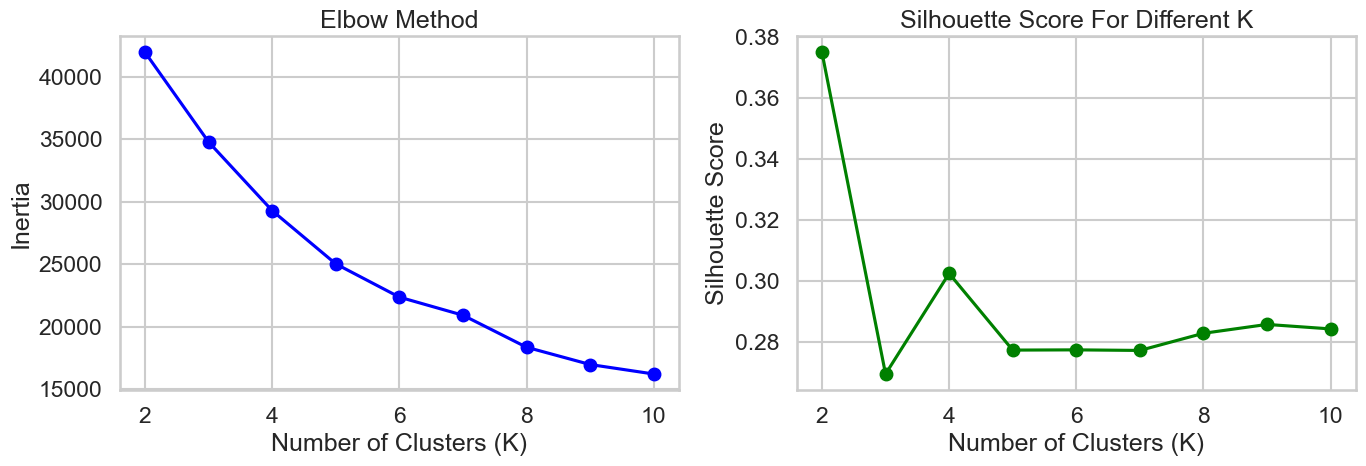

,K,Inertia,Silhouette_Score
0,2,41976.986832,0.374791
1,3,34791.527585,0.269511
2,4,29292.651807,0.302426
3,5,25027.370059,0.277337
4,6,22364.930084,0.277415
5,7,20915.159849,0.277225
6,8,18350.898024,0.282835
7,9,16964.892532,0.285741
8,10,16205.237610,0.284271



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
K,9.0,6.000000,2.738613,2.000000,4.000000,6.000000,8.000000,10.000000
Inertia,9.0,25098.850487,8747.732759,16205.237610,18350.898024,22364.930084,29292.651807,41976.986832
Silhouette_Score,9.0,0.292395,0.032203,0.269511,0.277337,0.282835,0.285741,0.374791


In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

def evaluate_kmeans_clusters(X_scaled, k_min=2, k_max=10):
    """
    Evaluate optimal number of clusters (k) using Elbow and Silhouette methods.
    Computes inertia and silhouette scores for k in [k_min, k_max].
    """
    
    inertias = []
    silhouette_scores = []
    K_range = range(k_min, k_max + 1) 
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        
        # cluster labels
        labels = kmeans.labels_ 
        
        #  silhouette score
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    
    # plotting elbow 
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    
    # plotting silhouette score
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'go-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Different K')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Create summary DataFrame
    opt_df = pd.DataFrame({
        'K': list(K_range),
        'Inertia': inertias,
        'Silhouette_Score': silhouette_scores
    })

    display(opt_df)
    print("\nSummary Statistics:")
    display(opt_df.describe().T)  

    return opt_df
    
opt_df = evaluate_kmeans_clusters(X_scaled)

### 2 clusters seems to be the optimal number of clusters since 2 has the highest silhouette score and the inertia kind of "drops" after 2. This kind of makes sense because of at risk or not.  

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.3 K-Means Clustering and Visualization (15 points)

Using the results from the previous analysis, choose an appropriate number of clusters (**k**, typically 3–5).

**K-Means** partitions patients into groups such that individuals in the same cluster are more similar to each other based on selected numeric features, while those in different clusters are more dissimilar.

**Tasks:**
1. Fit **K-Means** on the standardized feature matrix (`X_scaled`) with the chosen value of **k**.  
2. Reduce the dataset to 2 dimensions using **PCA** for visualization.  
3. Assign cluster labels to each patient and map descriptive names (e.g., *Low Risk*, *Moderate Risk*, *High Risk*).  
4. Plot the clusters in 2D PCA space and highlight the cluster centroids.

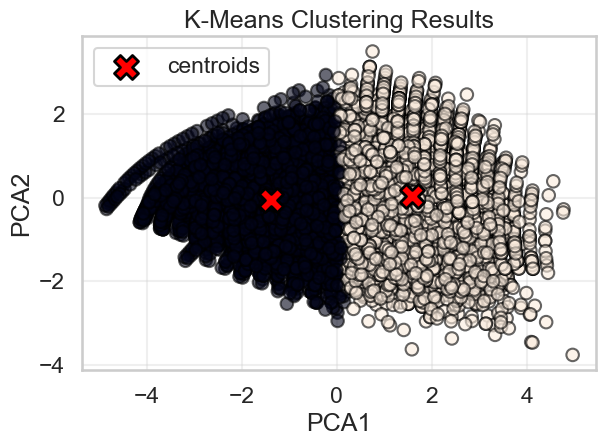

In [21]:
from sklearn.decomposition import PCA

def perform_kmeans_clustering(df, X_scaled, k=2):
    """
    Fit K-Means clustering, project to 2D PCA space, and visualize clusters.
    Returns DataFrame with cluster labels and centroids in PCA space.
    """
    # kmeans
    kmeans = KMeans(n_clusters = k, random_state = 42)
    clusters = kmeans.fit_predict(X_scaled)

    # pca 
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X_scaled)
    centroids_pca = pca.transform(kmeans.cluster_centers_)

    # cluster mapping
    cluster_names = {
        0: "Low Risk",
        1: "High Risk"
    }

    # the risk level with the corresponding cluster label
    cluster_labels = [cluster_names[cluster] for cluster in clusters]

    df["KMeans_cluster"] = clusters
    df["KMeans_cluster_label"] = cluster_labels

    df["KMeans_PCA1"] = X_pca[:, 0]
    df["KMeans_PCA2"] = X_pca[:, 1]
    
    plt.scatter(df["KMeans_PCA1"], df["KMeans_PCA2"], c = df["KMeans_cluster"], alpha = 0.6, edgecolors = "black")
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c = "red", marker = "X", s = 300, edgecolors = "black", linewidth = 2, label = "centroids")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title('K-Means Clustering Results')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return df, centroids_pca

df, centroids_pca = perform_kmeans_clustering(df, X_scaled, k=2)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.4 Cluster Profiling and Interpretation (10 points)

Once the clusters are formed, it is important to interpret what each group represents.  
We can do this by computing the **average feature values** for key indicators such as  
`age`, `SBI`, `CCS`, `ANRI`, and `stroke_risk_pct`.

**Tasks:**
1. Compute the mean values of these features for each cluster.  
2. Create a summary table showing the average characteristics per cluster.  
3. Briefly interpret what each cluster might represent (e.g., *young–low-risk*, *older–high-burden*).

In [22]:
def cluster_profiling(df):
    """
    Summarize and display average feature values for each cluster.
    """

    features = ["age", "SBI", "CCS", "ANRI", "stroke_risk_pct"]
    
    cluster_profile = df.groupby(["KMeans_cluster_label"])[features].mean()
    display(cluster_profile)

    return cluster_profile
    
cluster_profile = cluster_profiling(df)

,age,SBI,CCS,ANRI,stroke_risk_pct
KMeans_cluster_label,,,,,
High Risk,50.570362,4.068064,0.811315,1.734480,86.203130
Low Risk,36.752996,2.293809,0.235522,1.128606,41.436583


#### Patients with a high risk are older on average than patients with a low risk. Patients with high risk have a higher SBI - more symptoms. Patients at a high risk also tend to have irregular heartbeats and cardiovascular symptoms. High risk patients also have a higher stroke risk percentage on average.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.5 Cluster Risk Comparison (10 points)

To evaluate the clinical significance of each cluster, we compare their overall stroke risk levels.  
This helps determine whether certain clusters represent higher medical vulnerability.

**Tasks:**
1. For each cluster, compute:  
   - Mean `stroke_risk_pct`  
   - Proportion of patients where `at_risk = 1`  
2. Create a summary table showing these statistics.  
3. Visualize both metrics using side-by-side bar plots.

Cluster Risk Comparison Summary:


,stroke_risk_pct_mean,at_risk_proportion
KMeans_cluster,,
0,41.436583,0.284698
1,86.203130,0.996267


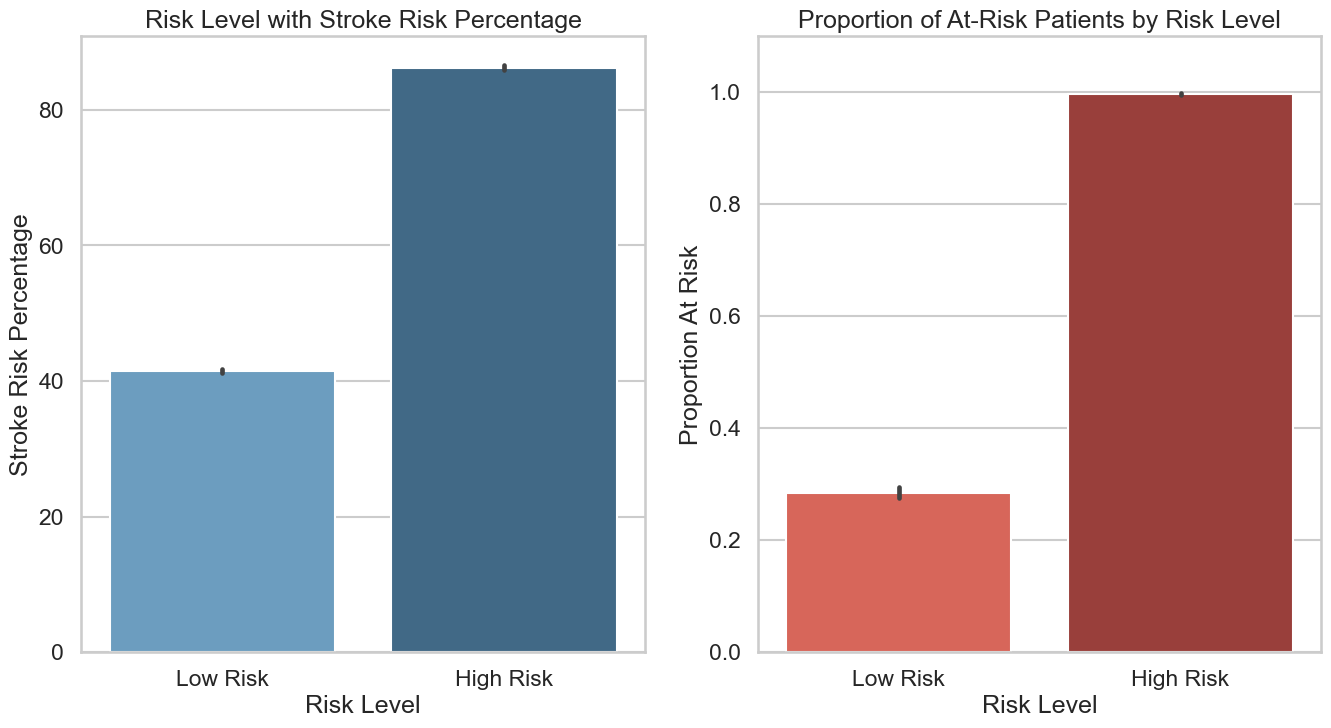

In [23]:
def cluster_risk_comparison(df):
    """
    Compare average stroke risk and at-risk proportion across clusters.
    """
    
    cluster_risk = df.groupby("KMeans_cluster")[["stroke_risk_pct", "at_risk"]].mean()
    cluster_risk.columns = ["stroke_risk_pct_mean", "at_risk_proportion"]
    print("Cluster Risk Comparison Summary:")
    display(cluster_risk) 
    print("\n")  
    
    # defining two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize = (16, 8))

    # first subplot
    sns.barplot(
        data=df,
        x="KMeans_cluster_label",  
        y="stroke_risk_pct",
        ax=axes[0], 
        palette="Blues_d"
    )

    axes[0].set_title("Risk Level with Stroke Risk Percentage")
    axes[0].set_xlabel("Risk Level")
    axes[0].set_ylabel("Stroke Risk Percentage")

    # second subplot
    sns.barplot(
        data=df, 
        x="KMeans_cluster_label", 
        y="at_risk",  # Mean of 0/1 = proportion
        ax=axes[1], 
        palette="Reds_d"
    )
    axes[1].set_ylim(0, 1.1)  # Scale from 0 to 1 for proportions
    axes[1].set_xlabel("Risk Level")
    axes[1].set_ylabel("Proportion At Risk")
    axes[1].set_title("Proportion of At-Risk Patients by Risk Level")
    
    
    return cluster_risk
    
cluster_risk = cluster_risk_comparison(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.6 Gaussian Mixture Model (GMM) Comparison (25 points)

While K-Means assigns each point to exactly one cluster,  
a **Gaussian Mixture Model (GMM)** allows *probabilistic* membership, capturing overlap between patient groups.

**Tasks:**
1. Fit a GMM with the same number of clusters (**k**) used in K-Means.  
2. Align GMM cluster labels with K-Means labels for consistency.  
3. Compute the **Adjusted Rand Index (ARI)** to quantify agreement between the two models.  
4. Visualize both K-Means and GMM results side by side in PCA space.

The Cluster Stroke Risk Percentages are:
GMM_Cluster
0    45.326218
1    89.184879
Name: stroke_risk_pct, dtype: float64
------------------------------------------------------------


The Adjusted Rand Index score between KMeans and GMM is:  0.44640784470098305


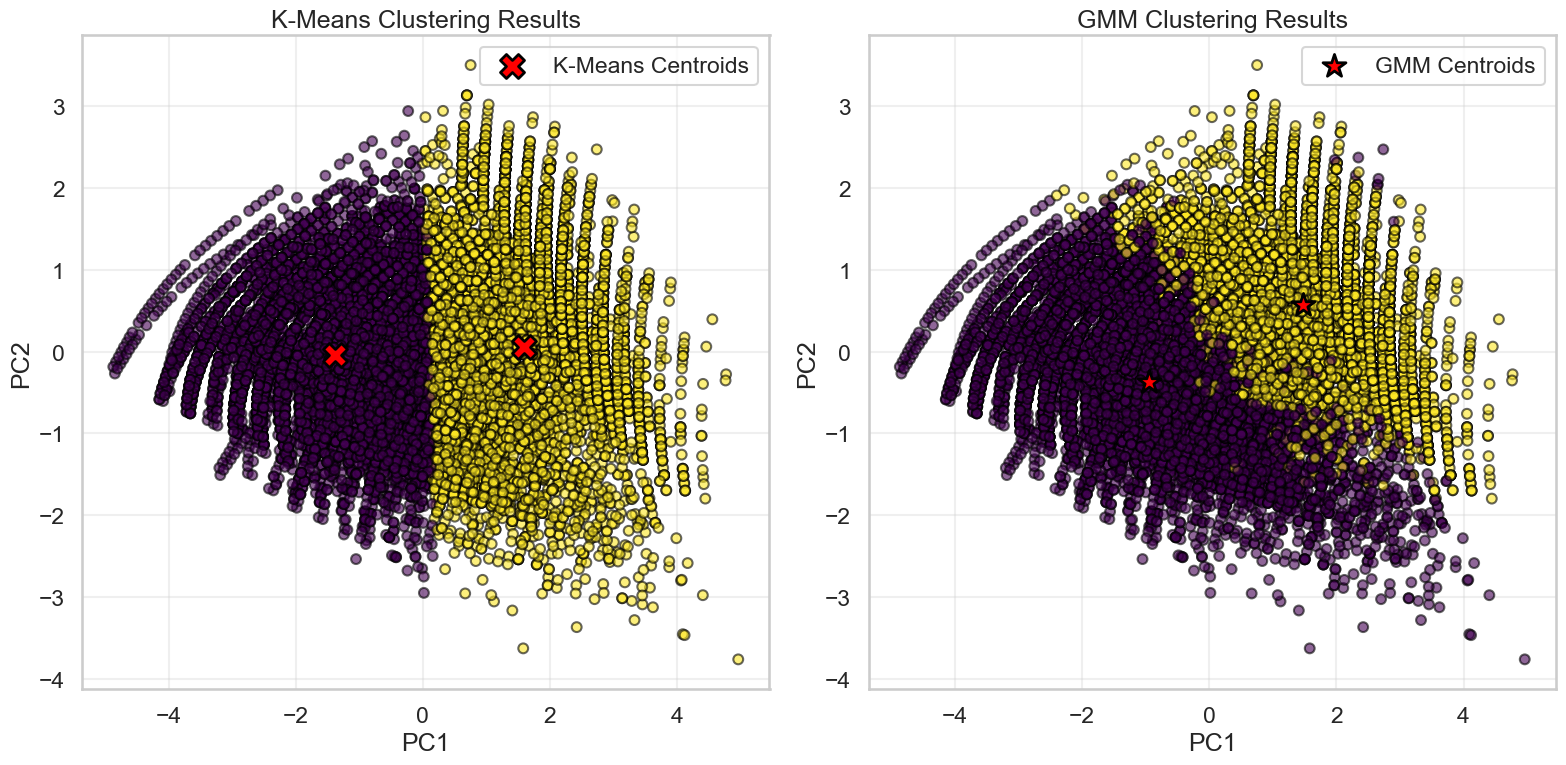

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

def compare_kmeans_gmm(df, X_scaled, centroids_pca, k=2):
    """
    Compare K-Means and Gaussian Mixture Model (GMM) clustering.
    Computes Adjusted Rand Index (ARI) and visualizes both cluster assignments.
    """
    
    # fitting the GMM
    gmm = GaussianMixture(
    n_components=k,           # Number of Gaussian components
    covariance_type='full',   # 'full', 'tied', 'diag', 'spherical'
    max_iter=100,             # Max EM iterations
    n_init=10,                # Number of initializations
    random_state=42,          
    tol=1e-3                  # Convergence threshold
    )
    
    gmm_clusters = gmm.fit_predict(X_scaled)

    df['GMM_Cluster'] = gmm_clusters
    
    # making sure the cluster labels are consistent - 0 is low, 1 is high 
    cluster_means = df.groupby('GMM_Cluster')['stroke_risk_pct'].mean()
    print("The Cluster Stroke Risk Percentages are:")
    print(cluster_means)
    print("---" * 20)
    print("\n")

    # aligning the cluster labels with the K-means labels 
    dictionary = {0: "Low Risk", 
                 1: "High Risk"}
    df["GMM_Cluster_label"] = df["GMM_Cluster"].map(dictionary)

    # ARI between two models 
    ari_aligned = adjusted_rand_score(df["KMeans_cluster"], gmm_clusters) 
    print("The Adjusted Rand Index score between KMeans and GMM is: ", ari_aligned)

    
    # initializing PCA and fitting 
    pca = PCA(n_components = k)
    X_pca = pca.fit_transform(X_scaled)
    gmm_centroids_pca = pca.transform(gmm.means_)

    # defining GMM PCA variables 
    df["GMM_PCA1"] = X_pca[: , 0]
    df["GMM_PCA2"] = X_pca[:, 1]
    
    fig, axes = plt.subplots(1, 2, figsize = (16,8))

    # KMeans Plot
    axes[0].scatter(
        df["KMeans_PCA1"], 
        df["KMeans_PCA2"], 
        c=df["KMeans_cluster"],
        cmap="viridis", 
        alpha=0.6, 
        edgecolors="black",
        s=50
    )
    axes[0].scatter(
        centroids_pca[:, 0],
        centroids_pca[:, 1],
        c='red',
        marker='X',
        s=300,
        edgecolors='black',
        linewidths=2,
        label='K-Means Centroids'
    )
    axes[0].set_xlabel(f'PC1')
    axes[0].set_ylabel(f'PC2')
    axes[0].set_title('K-Means Clustering Results')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # GMM Plot
    axes[1].scatter(
        df["GMM_PCA1"], 
        df["GMM_PCA2"], 
        c=df["GMM_Cluster"],
        cmap="viridis", 
        alpha=0.6, 
        edgecolors="black",
        s=50
    )
    axes[1].scatter(
        gmm_centroids_pca[:, 0],
        gmm_centroids_pca[:, 1],
        c='red',
        marker='*',
        s=300,
        edgecolors='black',
        linewidths=2,
        label='GMM Centroids'
    )
    axes[1].set_xlabel(f'PC1')
    axes[1].set_ylabel(f'PC2')
    axes[1].set_title('GMM Clustering Results')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    return df, ari_aligned
    
df, ari_aligned = compare_kmeans_gmm(df, X_scaled, centroids_pca, k=2)

<!-- END QUESTION -->

### Part 3 - Predictive Modeling: Stroke Risk Classification & Regression

<!-- BEGIN QUESTION -->

#### Q3.1 Feature Preparation (Symptoms Only) (5 points)

In this step, we identify and prepare symptom-based features for later modeling.  
These features capture physical and cardiovascular symptoms which may contribute to stroke risk.

**Tasks:**
1. Select all **symptom-related binary columns** from the dataset.  
2. Initialize a preprocessing pipeline using `StandardScaler` for numeric scaling.  
3. Display the list of selected features to confirm correct feature selection.

In [41]:
from sklearn.pipeline import Pipeline

def prepare_symptom_features(df):
    """
    Select and scale symptom-related features for modeling.
    """
    symptom_cols = [
    'chest_pain',
    'high_bp',
    'irregular_heartbeat',
    'short_breath',
    'fatigue',
    'dizziness',
    'swelling',
    'excess_sweating',
    'persistent_cough',
    'nausea_vomiting',
    'chest_discomfort',
    'cold_extremities',
    'sleep_apnea',
    'anxiety'
    ]

    print("The selected columns are :")
    print(symptom_cols)
    
    scaler = StandardScaler()
    df[symptom_cols] = scaler.fit_transform(df[symptom_cols])

    preprocessor = Pipeline([
        ("scaler", StandardScaler())
    ])
    
    return symptom_cols, preprocessor
    
symptom_cols, preprocessor = prepare_symptom_features(df)

The selected columns are :
['chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue', 'dizziness', 'swelling', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 'sleep_apnea', 'anxiety']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.2 Regression – Predict Stroke Risk Percentage (20 points + bonus points)

Train regression models using symptom-only features to predict the continuous variable `stroke_risk_pct`.  
Evaluate them using **RMSE**, **MAE**, and **R²**.

At the minimum use the following models:
* k-nearest neighbors
* random forest
* linear regression

5 bonus points for each additional model you use, for up to 2 additional models.

Of course you are free to explore even more models.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_regressors(df, symptom_cols, preprocessor):
    """
    Train and evaluate multiple regression models for stroke risk prediction.
    """
    # prepare data
    X = df[symptom_cols]
    y = df['stroke_risk_pct']
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )
    
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}\n")
    
    # fit and transform preprocessor
    preprocessor.fit(X_train)
    X_train_scaled = preprocessor.transform(X_train)
    X_test_scaled = preprocessor.transform(X_test)
    
    print("Preprocessing complete!\n")
    
    # define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Decision Trees': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'K-Nearest Neighbors': KNeighborsRegressor()
    }
    
    trained_models = {} 
    results = []
    
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # train model
        model.fit(X_train_scaled, y_train)
        
        # save trained model for future use
        trained_models[model_name] = model  
        
        # predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # store results
        results.append({
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_MAE': train_mae,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'Test_R2': test_r2
        })
        
        print(f"{model_name} - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}\n")
    
    # create results dataframe
    reg_df = pd.DataFrame(results)
    
    print("Model Comparison:")
    display(reg_df)
        
    return reg_df, trained_models  

reg_df, trained_models = train_regressors(df, symptom_cols, preprocessor)

Training set: (11980, 14)
Test set: (2996, 14)

Preprocessing complete!

Training Linear Regression...
Linear Regression - Test R²: 0.5013, Test RMSE: 18.7458

Training Ridge Regression...
Ridge Regression - Test R²: 0.5013, Test RMSE: 18.7458

Training Lasso Regression...
Lasso Regression - Test R²: 0.4765, Test RMSE: 19.2049

Training Decision Trees...
Decision Trees - Test R²: 0.4336, Test RMSE: 19.9776

Training Random Forest...
Random Forest - Test R²: 0.4605, Test RMSE: 19.4964

Training K-Nearest Neighbors...
K-Nearest Neighbors - Test R²: 0.3798, Test RMSE: 20.9037

Model Comparison:


,Model,Train_RMSE,Train_MAE,Train_R2,Test_RMSE,Test_MAE,Test_R2
0,Linear Regression,18.664687,15.150935,0.509643,18.745784,15.176125,0.501267
1,Ridge Regression,18.664687,15.151101,0.509643,18.745765,15.176297,0.501268
2,Lasso Regression,19.124748,15.802767,0.485171,19.204940,15.840436,0.476536
3,Decision Trees,16.920489,12.461868,0.597007,19.977646,15.500744,0.433566
4,Random Forest,17.027098,12.943080,0.591913,19.496363,15.290963,0.460529
5,K-Nearest Neighbors,19.209210,15.082280,0.480614,20.903675,16.409219,0.379837


From these results, you can see that Ridge Regression the best model, achieving both the highest Test R² (0.501) and lowest Test RMSE (18.75).The model demonstrates great generalization with minimal overfitting (Train-Test gap = 0.008).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.3 Best Regression Model – Feature Importance (20 points)

For the regression model evaluated, visualize its **most important features** influencing the predicted stroke risk percentage.

BEST REGRESSION MODEL ANALYSIS

✅ Best Model: Ridge Regression
   Test R²: 0.5013
   Test RMSE: 18.7458
   Test MAE: 15.1763

📊 Top 10 Most Important Features:
------------------------------------------------------------


,Feature,Importance
1,high_bp,10.090283
0,chest_pain,7.378721
12,sleep_apnea,6.222588
3,short_breath,6.058494
10,chest_discomfort,6.007501
2,irregular_heartbeat,5.491012
4,fatigue,4.619499
5,dizziness,4.526829
11,cold_extremities,4.442174
6,swelling,4.355923


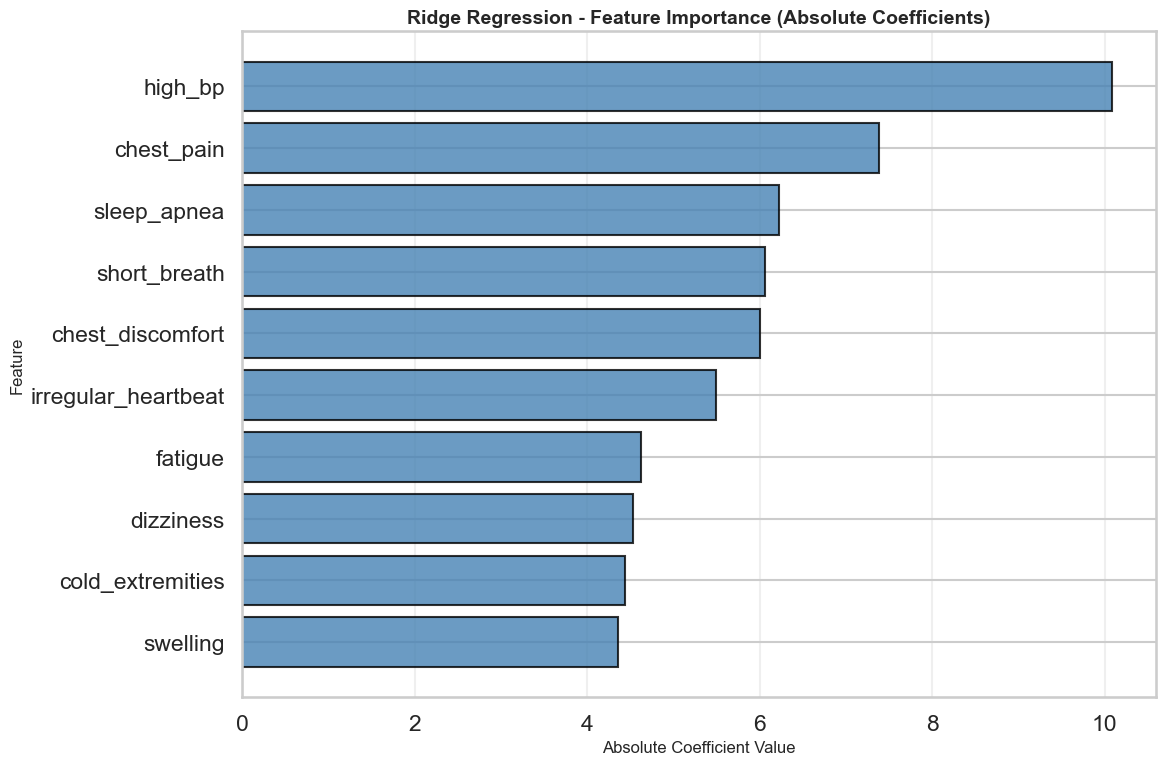


💡 INTERPRETATION:
------------------------------------------------------------
The top 3 most influential features are:
   1. high_bp: 10.0903
   2. chest_pain: 7.3787
   3. sleep_apnea: 6.2226

These symptoms have the strongest influence on stroke risk
prediction and should be prioritized in clinical assessment.


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_best_regressor(df, reg_df, symptom_cols, preprocessor, trained_models):
    """
    Display top features for the best-performing regression model.
    """
    best_model_row = reg_df.loc[reg_df['Test_R2'].idxmax()]
    best_model_name = best_model_row['Model']
    
    best_model_row = reg_df.loc[reg_df['Test_R2'].idxmax()]
    best_model_name = best_model_row['Model']
    
    print("=" * 60)
    print("BEST REGRESSION MODEL ANALYSIS")
    print("=" * 60)
    print(f"\n✅ Best Model: {best_model_name}")
    print(f"   Test R²: {best_model_row['Test_R2']:.4f}")
    print(f"   Test RMSE: {best_model_row['Test_RMSE']:.4f}")
    print(f"   Test MAE: {best_model_row['Test_MAE']:.4f}")
    
    
    # get the trained model from dictionary
    best_model = trained_models[best_model_name]  # ← GET IT HERE
    
    
    # check model type and get importances
    if hasattr(best_model, 'feature_importances_'):
        # tree-based models
        importances = best_model.feature_importances_
        title = f'{best_model_name} - Feature Importance'
        xlabel = 'Importance Score'
        
    elif hasattr(best_model, 'coef_'):
        # linear models (Ridge, Lasso, Linear Regression)
        importances = np.abs(best_model.coef_)
        title = f'{best_model_name} - Feature Importance (Absolute Coefficients)'
        xlabel = 'Absolute Coefficient Value'
        
    else:
        print("\n⚠️ Model doesn't support feature importance extraction!")
        return best_model_name
    
    
    # feature importance df 
    feature_importance_df = pd.DataFrame({
        'Feature': symptom_cols,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n📊 Top 10 Most Important Features:")
    print("-" * 60)
    display(feature_importance_df.head(10))
    
    # feature importance
    top_n = 10
    top_features = feature_importance_df.head(top_n)
    # plotting the top 10 features 
    plt.figure(figsize=(12, 8))
    plt.barh(top_features['Feature'], 
             top_features['Importance'],
             color='steelblue',
             edgecolor='black',
             alpha=0.8)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()  # highest at top
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
    # interpretation
    print(f"\n💡 INTERPRETATION:")
    print("-" * 60)
    top_3 = feature_importance_df['Feature'].head(3).tolist()
    print(f"The top 3 most influential features are:")
    for i, feature in enumerate(top_3, 1):
        importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].values[0]
        print(f"   {i}. {feature}: {importance:.4f}")
    
    print(f"\nThese symptoms have the strongest influence on stroke risk")
    print(f"prediction and should be prioritized in clinical assessment.")
    print("=" * 60)
    
    return best_model_name


best_reg_name = analyze_best_regressor(df, reg_df, symptom_cols, preprocessor, trained_models)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.4 Classification – Predict Stroke Risk Category (20 points + bonus points)

Using the same symptom-only features, train classification models to predict whether a patient is **at risk of stroke (1)** or **not at risk (0)**.  
Evaluate using **AUC**, **Accuracy**, **F1**, and **Balanced Accuracy**.

Use the following models:
* Random Forest
* k-nearest neighbors
* logistic regression

5 bonus points for each additional model you use, for up to 2 additional models.

Of course you are free to explore even more models.

In [ ]:
...

def train_classifiers(df, symptom_cols, preprocessor):
    """
    Train and evaluate multiple classification models to predict at-risk status.
    """
    
    ...

cls_df = train_classifiers(df, symptom_cols, preprocessor)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.5 Best Classification Model – Confusion Matrix & Feature Importance (15 points)

For the model evaluated, display its **confusion matrix** and visualize its **most important features** influencing the stroke-risk classification.

In [ ]:
...

def analyze_best_classifier(df, cls_df, symptom_cols, preprocessor):
    """
    Analyze and visualize the best classification model.
    """
    
    ...

best_cls_name = analyze_best_classifier(df, cls_df, symptom_cols, preprocessor)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.6 Kaggle Submission (15 points + bonus points)

In the Kaggle competition, you will generate predictions for an unseen test dataset.  
Since the hidden test file is **not provided**, we will simulate this process using our model’s predictions on the validation (test) split.

**Tasks:**
1. Use your **best classification model** to predict stroke risk (`at_risk`) on the test set.  
2. Create a **submission DataFrame** with columns:  
   - `id` (sequential from 1 to n)  
   - `at_risk` (predicted 0 or 1)  
3. Save it as `sample_submission.csv` to simulate a Kaggle submission file.

The top 10 finishers get an additional 10 bonus points.

The 11-20 finishers get an additional 5 bonus points.

In [ ]:
def create_kaggle_submission_simulated(df, symptom_cols, preprocessor, cls_df, filename="kaggle_submission.csv"):
    """
    Create Kaggle-style submission using the best classification model from cls_df.
    """
    
    ...

submission = create_kaggle_submission_simulated(df, symptom_cols, preprocessor, cls_df)

<!-- END QUESTION -->

